<img src="../images/CONFIDENT DATA SCIENCE.png" alt="An image that reads Confident Data Science: The Essential Skills of Data Science, Companion Jupyter Notebook + Coding Examples. Also shows book image."/>

## Chapter 11 *Business Value + Clients*

To give citation to these coding examples give reference to an appropriate chapter and page of:

*Confident Data Science: Discover the essential skills of data science* <br>
(Confident Series, 15) 1st Edition by Adam Ross Nelson (Author) <br>
Publisher : Kogan Page (September 26, 2023).


## Wrangle The Data

In [1]:
# Import the Pandas, Numpy, & Seaborn libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Set the Seaborn display context to talk
sns.set_context('talk')

# Load ConfidentDataCh9Social.csv
df = pd.read_csv('../data/confident_ch9socialsents.csv', 
                 parse_dates=['Date'])

# Drop outliers (known from previous notebooks & chapters)
df.drop([0, 86], inplace=True)

# Display the shape of the data
print(df.shape)

# Show the results
df.sample(3)

(192, 11)


,Date,ShareCommentary,Reactions,Comments,User,Sentiment_ggl,Magnitude_ggl,Negative_nltk,Neutral_nltk,Positive_nltk,Compound_nltk
116,2020-02-05,Taking a moment to give some visibility to the...,2.0,0.0,1011,0.4,2.2,0.038,0.853,0.109,0.6259
20,2022-09-14,I had a client tell me yesterday that he bough...,27.0,10.0,1021,0.0,3.6,0.000,0.894,0.106,0.9688
183,2021-08-20,Social responsibility and corporate social res...,7.0,3.0,1051,0.4,2.3,0.014,0.718,0.268,0.9831


### Three Added Steps

In [2]:
# Engineer a new feature that will show length of the post
df['len'] = df['ShareCommentary'].str.len()

# Engineer a new feature that will regroup users
df['group'] = df['User'].map({1010:'Biz Owner',1011:'Biz Owner',
                              1020:'Biz Owner',1021:'Biz Owner',
                              1030:'Economist',1031:'Economist',
                              1040:'C-Suite',1041:'C-Suite',
                              1050:'Marketing',1051:'Marketing'})

# Count the number of hashtags in each post
df['hashtags'] = df['ShareCommentary'].str.count('#')

# Convert hashtags to a binary predictor
# Use list comprehension to set posts with hashtag counts 
# at or below 4 as a 1 and otherwise as 0
df['hashtags'] = [1 if x <=4 
                  else 0 for x in df['hashtags']]

# Create a binary predictor variable that will be 1 if the post
# occurred on a Wednesday, Thursday, Friday, or Saturday
df['wed_t_sat'] = [1 if x in ['Wednesday','Thursday',
                              'Friday','Saturday'] 
                   else 0 for x in df['Date'].dt.day_name()]

# Create new binary target var (Reac short for Reactions bin short for binary)
# Preserve a display of the cut points (print median Reactions)
print(f"Median reactions are: {df['Reactions'].describe()['50%']}")

# Use list comprehension to set posts with reaction counts 
# at or above the median as 1 and otherwise as 0
df['Reac_bin'] = [1 if x >= df['Reactions'].describe()['50%'] 
                  else 0 for x in df['Reactions']]

# Create new binary target var (Comm short for Comments bin short for binary)
# Preserve a display of the cut points (print median Reactions)
print(f"Median comments are: {df['Comments'].describe()['50%']}")

# Use list comprehension to set posts with reaction counts 
# at or above the median as 1 and otherwise as 0
df['Comm_bin'] = [1 if x >= df['Comments'].describe()['50%'] 
                  else 0 for x in df['Comments']]

# Show the results
df[['ShareCommentary','Reactions','Comments','len','group',
    'hashtags','wed_t_sat','Reac_bin','Comm_bin']].sample(6)

Median reactions are: 8.0
Median comments are: 1.0


,ShareCommentary,Reactions,Comments,len,group,hashtags,wed_t_sat,Reac_bin,Comm_bin
104,First-time claims for unemployment insurance t...,3.0,1.0,1269,Economist,0,1,0,1
134,First-time claims for unemployment insurance t...,4.0,0.0,665,Economist,0,1,0,0
114,I was re-watching Star Trek Voyager season 3 e...,4.0,0.0,265,Biz Owner,1,1,0,0
180,Industry insights and trends:\nStaying up-to-d...,4.0,3.0,570,Marketing,1,1,0,1
110,Congratulations to the Data Coalition for thei...,1.0,0.0,92,C-Suite,1,0,0,0
192,Being an economist may not be the most glamoro...,3.0,4.0,830,Marketing,1,1,0,1


### Inspecting For Accurate Wrangling

In [3]:
df[['Date','Reactions','Comments','Reac_bin',
    'Comm_bin','len','hashtags','wed_t_sat']].sample(6)

,Date,Reactions,Comments,Reac_bin,Comm_bin,len,hashtags,wed_t_sat
23,2022-06-30,21.0,45.0,1,1,1463,1,1
72,2022-06-12,5.0,0.0,0,0,792,1,0
29,2022-10-20,18.0,0.0,1,0,158,0,1
56,2021-01-06,9.0,5.0,1,1,1283,1,1
13,2022-10-26,29.0,20.0,1,1,692,1,1
177,2021-06-07,8.0,2.0,1,1,669,1,0


In [4]:
# Check the hastag work
pd.crosstab(
    df['ShareCommentary'].str.count('#'), df['hashtags']).transpose()


ShareCommentary,0,1,2,3,4,5,6,7,9,10,12,13,14,17,19,20,22
hashtags,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,7,5,3,1,2,1,2,2,2,1,12,1
1,52,16,27,40,18,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
# Check the wed_t_sat variable results
pd.crosstab(
    df['Date'].dt.day_name(), df['wed_t_sat']).transpose()


Date,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
wed_t_sat,,,,,,,
0,0,30,0,7,0,22,0
1,33,0,19,0,57,0,24


In [6]:
# Check for proper coding of the Reac_bin variable
pd.crosstab(
    df['Reactions'], df['Reac_bin']).transpose()


Reactions,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,32.0,35.0,36.0,37.0,38.0,41.0,45.0,46.0,53.0,55.0
Reac_bin,,,,,,,,,,,,,,,,,,,,,
0,2,8,8,17,18,9,12,15,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,12,7,...,1,2,1,1,2,1,1,1,1,1


In [7]:
# Check for proper coding of the Comm_bin variable
pd.crosstab(
    df['Comments'], df['Comm_bin']).transpose()


Comments,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,19.0,20.0,21.0,22.0,24.0,28.0,31.0,38.0,45.0,58.0
Comm_bin,,,,,,,,,,,,,,,,,,,,,
0,81,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,20,9,12,15,10,9,9,1,3,...,1,1,1,1,1,1,2,1,1,1


## Select + Apply

### K-Nearest Neighbors

#### How It Works

Text(0, 0.5, 'Sentiment Magnitude')

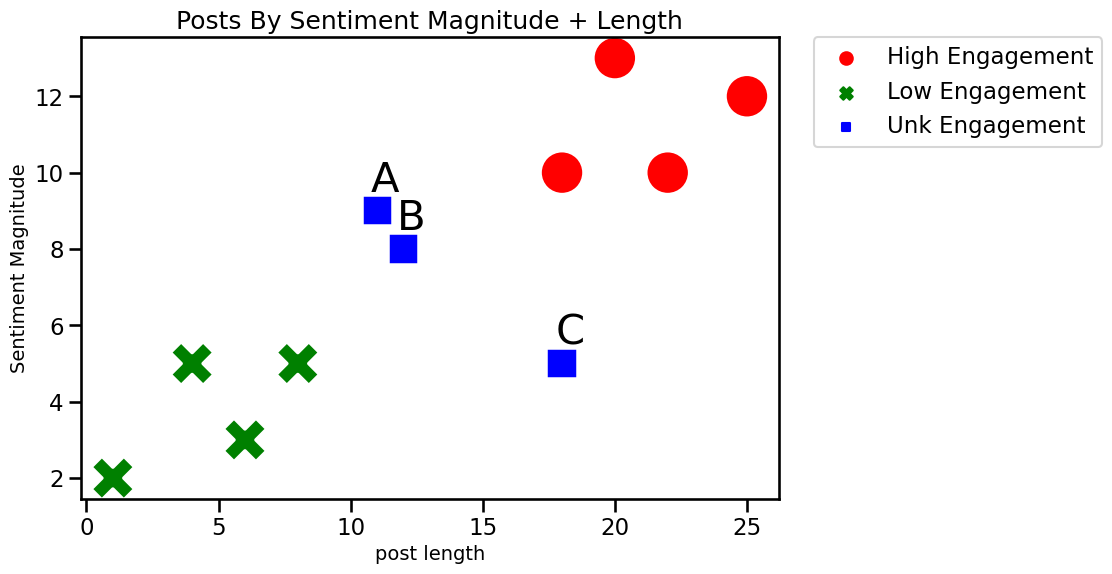

In [8]:
vis = pd.DataFrame(
    {'Magnitude_ggl':[13,10,12,10,3,5,5,2,9,8,5],
     'len':[20,18,25,22,6,4,8,1,11,12,18],
     'Engage':['High Engagement','High Engagement',
               'High Engagement','High Engagement',
               'Low Engagement','Low Engagement',
               'Low Engagement','Low Engagement',
               'Unk Engagement','Unk Engagement',
               'Unk Engagement']})

plt.figure(figsize=(9, 6))
sns.scatterplot(data=vis, y='Magnitude_ggl',
                x='len', hue='Engage',
                s=1000, style='Engage',
                palette=['red', 'green', 'blue'])

plt.annotate('A', (10.75,9.5), fontsize=30)
plt.annotate('B', (11.75,8.5), fontsize=30)
plt.annotate('C', (17.75,5.5), fontsize=30)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.title('Posts By Sentiment Magnitude + Length', fontsize=18)
plt.xlabel('post length', fontsize=14)
plt.ylabel('Sentiment Magnitude', fontsize=14)

#### Making It Work (K-Nearest Neighbors)

In [9]:
df

,Date,ShareCommentary,Reactions,Comments,User,Sentiment_ggl,Magnitude_ggl,Negative_nltk,Neutral_nltk,Positive_nltk,Compound_nltk,len,group,hashtags,wed_t_sat,Reac_bin,Comm_bin
1,2021-04-10,"Ok, I’m just going to say it: I am not a guy. ...",55.0,18.0,1040,-0.2,4.3,0.069,0.816,0.115,0.6115,459,C-Suite,1,1,1,1
2,2020-12-10,U.S. Department of Education has released its ...,53.0,9.0,1040,0.2,0.8,0.000,0.889,0.111,0.3595,150,C-Suite,0,1,1,1
3,2022-08-19,"This week I lost a contract. A big one.""\r\n""""...",45.0,9.0,1011,0.2,11.3,0.045,0.816,0.139,0.9632,1231,Biz Owner,1,1,1,1
4,2022-04-09,A Saturday morning creep. On LinkedIn. Total...,41.0,58.0,1020,0.0,5.0,0.223,0.777,0.000,-0.8957,289,Biz Owner,1,1,1,1
5,2021-11-11,"A week out from Thanksgiving, and I have found...",36.0,21.0,1021,0.5,14.5,0.014,0.776,0.210,0.9968,1875,Biz Owner,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,2021-08-26,Recruiting and hiring best practices:\nRecruit...,3.0,1.0,1051,0.6,3.1,0.000,0.653,0.347,0.9905,661,Marketing,1,1,0,1
190,2021-02-07,Success stories and case studies:\nReading suc...,2.0,1.0,1050,0.7,3.6,0.000,0.585,0.415,0.9943,610,Marketing,1,0,0,1
191,2021-08-12,Networking and building professional relations...,3.0,1.0,1051,0.5,2.9,0.000,0.774,0.226,0.9744,696,Marketing,1,1,0,1
192,2021-02-27,Being an economist may not be the most glamoro...,3.0,4.0,1050,0.7,4.2,0.000,0.749,0.251,0.9931,830,Marketing,1,1,0,1


/Users/adamrossnelson/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/adamrossnelson/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

Text(18, 0.32, 'Best Error-Rate With Fewest K')

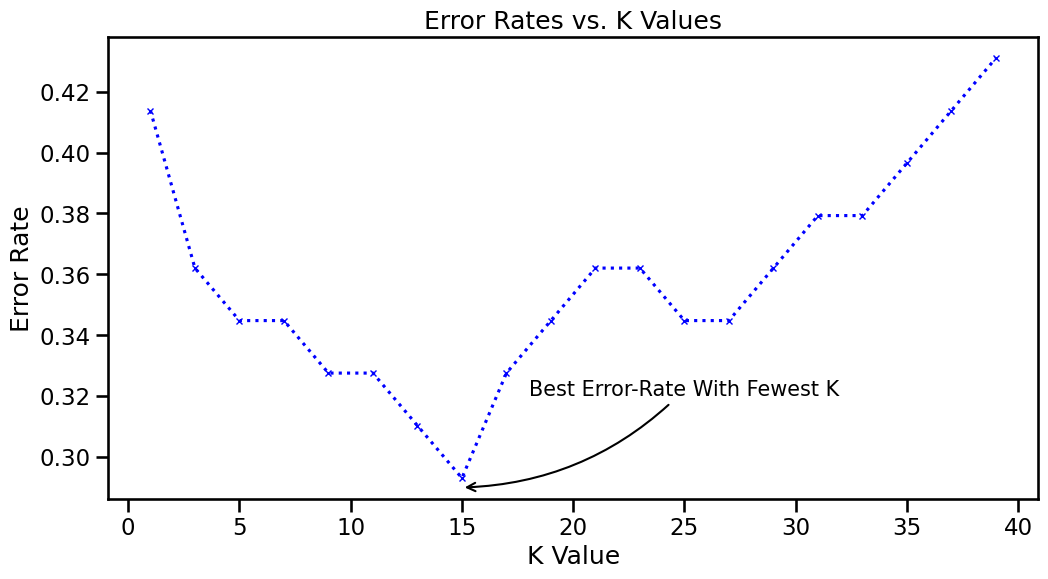

In [10]:
# Importing sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Splitting the data into training and testing sets
X = df[['Sentiment_ggl', 'Magnitude_ggl', 
        'len', 'wed_t_sat', 'hashtags']]
y = df['Reac_bin']

# Split the data for training and testing purposes
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Search for optimal k by starting an empty list of error rates
error_rates = []

# Begin a loop that will loop through all odd numbers from 1 to 41
for k in range(1, 41, 2):
    # Creating the k-NN classification model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)

    # Generate predictions on the testing data
    y_pred_kn = knn.predict(X_test_scaled)
    # Calculate and record proprtion of correct classifications
    error_rates.append(np.mean(y_pred_kn != y_test))

# Plot the error rates (which are inverse of AUC).
plt.figure(figsize=(12, 6))
plt.plot(range(1, 41, 2), error_rates, color='blue',
         linestyle=':', marker='x', markersize=5)
plt.title('Error Rates vs. K Values')
plt.xlabel('K Value')
plt.ylabel('Error Rate')

plt.annotate(text='Best Error-Rate With Fewest K', 
             xy=(15, .29), xytext=(18, .32), fontsize=15,
             arrowprops={'arrowstyle':'->', 'connectionstyle':'arc3, rad=-.2'})

In [12]:
# Retrain the model with k = 15 (the optimal)
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train_scaled, y_train)

# Generate predictions on testing data for later reference
y_pred_kn = knn.predict(X_test_scaled)

# Save performance results for later review
accuracy_kn = accuracy_score(y_test, y_pred_kn)
class_report_kn = classification_report(y_test, y_pred_kn)

# Display the accuracy score + classification report
print(class_report_kn)

              precision    recall  f1-score   support

           0       0.62      0.65      0.64        23
           1       0.76      0.74      0.75        35

    accuracy                           0.71        58
   macro avg       0.69      0.70      0.70        58
weighted avg       0.71      0.71      0.71        58



/Users/adamrossnelson/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### Simple Linear Regression

#### How It Works

Text(6, 17, 'Posts With Magnitude 11\nExpects 14 Reactions')

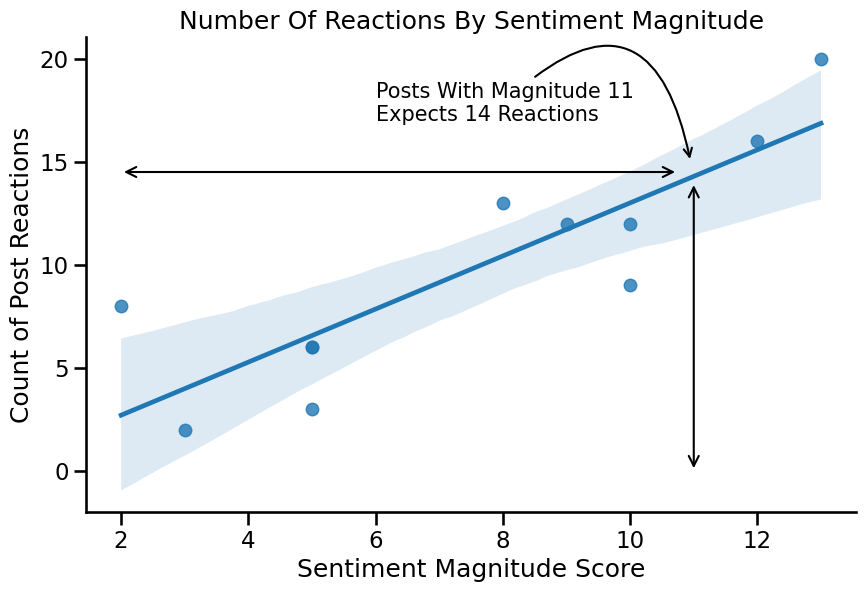

In [13]:
vis = pd.DataFrame(
    {'Magnitude_ggl':[13,10,12,10,3,5,5,2,9,8,5],
     'Reactions':[20,12,16,9,2,3,6,8,12,13,6]})


sns.lmplot(data=vis, x='Magnitude_ggl', y='Reactions', 
           height=6, aspect=1.5)
plt.title('Number Of Reactions By Sentiment Magnitude')
plt.xlabel('Sentiment Magnitude Score')
plt.ylabel('Count of Post Reactions')

plt.annotate(text='', xy=(11, 14), xytext=(11,0),
            arrowprops={'arrowstyle':'<->'})
plt.annotate(text='', xy=(10.75, 14.5), xytext=(2,14.5),
            arrowprops={'arrowstyle':'<->'})
plt.annotate(text='Posts With Magnitude 11\nExpects 14 Reactions',
            xy=(10.95, 15), xytext=(6,17), fontsize=15,
            arrowprops={'arrowstyle':'->', 
                        'connectionstyle':'arc3, rad=-.9'})


#### Making It Work (Regression)

In [14]:
# Importing sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

In [15]:
df.sample(2)

,Date,ShareCommentary,Reactions,Comments,User,Sentiment_ggl,Magnitude_ggl,Negative_nltk,Neutral_nltk,Positive_nltk,Compound_nltk,len,group,hashtags,wed_t_sat,Reac_bin,Comm_bin
147,2021-04-29,Navigating the healthcare system can be a tota...,14.0,4.0,1051,-0.1,1.7,0.0,0.886,0.114,0.7096,313,Marketing,1,1,1,1
181,2020-09-20,Industry events and conferences:\nAttending in...,7.0,2.0,1050,0.5,2.0,0.0,0.861,0.139,0.9200,585,Marketing,1,0,0,1


In [16]:
# Splitting the data into training and testing sets
X = df[['Sentiment_ggl', 'Magnitude_ggl', 
        'len', 'wed_t_sat', 'hashtags']]
y = df['Reactions']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Adding an intercept to the model
X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = sm.add_constant(X_test_scaled)

# Training the OLS regression model
ols = sm.OLS(y_train, X_train_scaled)
ols_results = ols.fit()

# Renaming the columns in the OLS regression results summary
column_names = ['Intercept'] + list(X.columns)
ols_results_summary = ols_results.summary(xname=column_names)
# Show the results of the regression estimations
print(ols_results_summary)


                            OLS Regression Results                            
Dep. Variable:              Reactions   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     11.66
Date:                Mon, 10 Apr 2023   Prob (F-statistic):           2.09e-09
Time:                        19:42:22   Log-Likelihood:                -516.71
No. Observations:                 144   AIC:                             1045.
Df Residuals:                     138   BIC:                             1063.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        11.4306      0.745     15.342

In [17]:
# Evaluating the model
y_pred_lm = ols_results.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred_lm)
rmse = np.sqrt(mse)
print('Root mean squared error: {:.2f}'.format(rmse))


Root mean squared error: 8.91


In [18]:
# Calcualte the standard deviation on the number of Reactions
df['Reactions'].mean()

11.473958333333334

In [19]:
# Calculate RMSE in terms of standard deviations on Reactions
print('RMSE in terms of Reactions S.D. : {:.2f}'.format(
      rmse / df['Reactions'].mean()))

RMSE in terms of Reactions S.D. : 0.78


## Check + Recheck

In [20]:
# Display knn model (k=15) classification report and other metrics
print("Accuracy: {:.2f}".format(accuracy_kn))
print("Classification Report:")
print(class_report_kn)


Accuracy: 0.71
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.65      0.64        23
           1       0.76      0.74      0.75        35

    accuracy                           0.71        58
   macro avg       0.69      0.70      0.70        58
weighted avg       0.71      0.71      0.71        58



Text(28, 23, 'Received 27 Reactions')

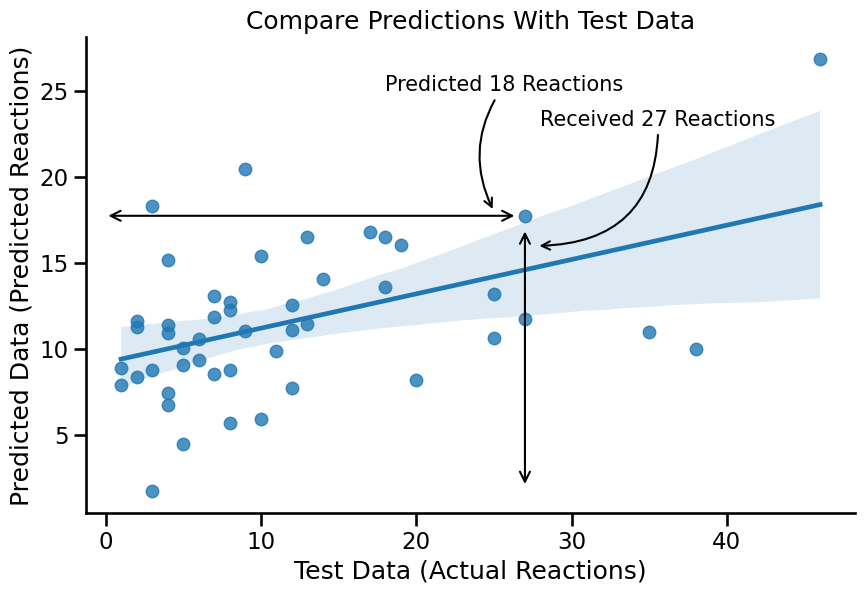

In [25]:
# Compare regression test with regression predictions
sns.lmplot(data=pd.DataFrame({'y_test':y_test,
                              'y_pred_lm':y_pred_lm}),
           x='y_test', y='y_pred_lm', 
           height=6, aspect=1.5)
plt.title('Compare Predictions With Test Data')
plt.xlabel('Test Data (Actual Reactions)')
plt.ylabel('Predicted Data (Predicted Reactions)')


plt.annotate(text='', xy=(27, 17), xytext=(27,2),
            arrowprops={'arrowstyle':'<->'})

plt.annotate(text='', xy=(26.5, 17.75), xytext=(0,17.75),
            arrowprops={'arrowstyle':'<->'})

plt.annotate(text='Predicted 18 Reactions',
            xy=(25, 18), xytext=(18,25), fontsize=15,
            arrowprops={'arrowstyle':'->', 
                        'connectionstyle':'arc3, rad=.3'})

plt.annotate(text='Received 27 Reactions',
            xy=(27.75, 16), xytext=(28,23), fontsize=15,
            arrowprops={'arrowstyle':'->', 
                        'connectionstyle':'arc3, rad=-.5'})

## AUC + ROC Box  Out

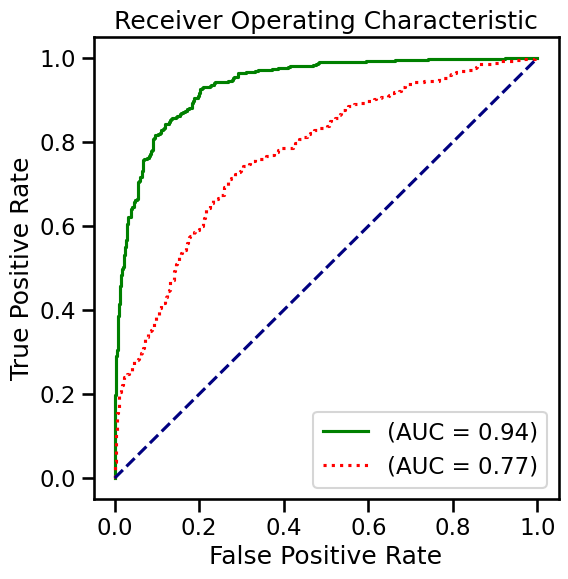

In [22]:
from sklearn import metrics

# Generate labels for a binary classification
y_true = np.array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1] * 100)

# Generate predictions closer to true values
y_score_good = y_true + np.random.normal(
     loc=0.5, scale=0.5, size=1000)

# Generate predictions farther from true values
y_score_bad = y_true + np.random.normal(
     loc=0.5, scale=1.0, size=1000)

# Calculate the fpr and tpr for the good model
fpr_good, tpr_good, thresh = metrics.roc_curve(
     y_true, y_score_good)
roc_auc_good = metrics.auc(fpr_good, tpr_good)

# Calculate the fpr and tpr for the bad model
fpr_bad, tpr_bad, thresholds = metrics.roc_curve(
     y_true, y_score_bad)
roc_auc_bad = metrics.auc(fpr_bad, tpr_bad)

# Specify the plot size
plt.subplots(figsize=(6, 6))

# Plot the ROC curves
plt.plot(fpr_good, tpr_good, color='green', 
         label='(AUC = %0.2f)' % roc_auc_good)
plt.plot(fpr_bad, tpr_bad, color='red', linestyle=':', 
         label='(AUC = %0.2f)' % roc_auc_bad)

# Plot the reference line
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

# Generate random data for two models
y_true = np.random.randint(2, size=100)
y_scores1 = np.random.rand(100)
y_scores2 = np.random.normal(loc=0.7, scale=0.2, size=100)

# Compute false positive rate and true positive rate for each model
fpr1, tpr1, _ = metrics.roc_curve(y_true, y_scores1)
fpr2, tpr2, _ = metrics.roc_curve(y_true, y_scores2)

# Compute AUC for each model
auc1 = metrics.roc_auc_score(y_true, y_scores1)
auc2 = metrics.roc_auc_score(y_true, y_scores2)

# Plot ROC curves for each model
plt.plot(fpr1, tpr1, label=f'Model 1 (AUC = {auc1:.2f})')
plt.plot(fpr2, tpr2, label=f'Model 2 (AUC = {auc2:.2f})')

# Plot the reference line
plt.plot([0, 1], [0, 1], 'k--', label='Reference line (AUC = 0.5)')

# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

plt.show()


## Update + Change Log

March, 2023 - Created notebook.<br>
April, 2023 - Prepared for GitHub.